In [33]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# normalizing data (a pixel goes from 0 to 255)
# X = X/255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Building the model
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# The output layer with 4 neurons, for 4 classes
model.add(Dense(15))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Training the model, with 20 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1)

Train on 10124 samples, validate on 1125 samples
Epoch 1/20
10124/10124 [==============================] - 6s 619us/sample - loss: 3.3896 - acc: 0.0753 - val_loss: 2.6161 - val_acc: 0.1182
Epoch 2/20
10124/10124 [==============================] - 6s 558us/sample - loss: 2.4008 - acc: 0.2086 - val_loss: 1.7251 - val_acc: 0.4311
Epoch 3/20
10124/10124 [==============================] - 5s 539us/sample - loss: 1.6832 - acc: 0.4337 - val_loss: 1.4247 - val_acc: 0.5520
Epoch 4/20
10124/10124 [==============================] - 5s 530us/sample - loss: 1.3005 - acc: 0.5927 - val_loss: 0.9858 - val_acc: 0.6969
Epoch 5/20
10124/10124 [==============================] - 5s 534us/sample - loss: 1.0606 - acc: 0.6729 - val_loss: 0.8613 - val_acc: 0.7173
Epoch 6/20
10124/10124 [==============================] - 5s 533us/sample - loss: 0.9190 - acc: 0.7238 - val_loss: 0.7810 - val_acc: 0.7449
Epoch 7/20
10124/10124 [==============================] - 5s 529us/sample - loss: 0.8169 - acc: 0.7559 - val_lo

Saved model to disk
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


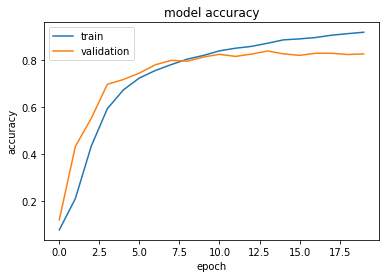

In [34]:
# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('kerasmodel.h5')

# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


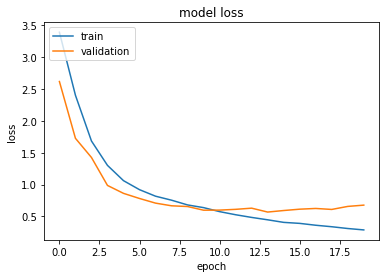

In [35]:
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_24 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_25 (Activation)   (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 64)         

In [37]:
print('\n# Evaluate on test data')
results = model.evaluate(X_test, y_test, batch_size=32)
print('test loss, test acc:', results)



# Evaluate on test data
3750/3750 [==============================] - 1s 169us/sample - loss: 0.6785 - acc: 0.8304
test loss, test acc: [0.6785072099884351, 0.8304]
